In [1]:
# # 초기 1회 실행
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# 📥 데이터 다운로드 (Download Dataset)
# GitHub에서 refrigerator.csv 파일을 다운로드합니다.

!wget https://raw.githubusercontent.com/Dropthe-bit/ai_portfolio/main/data/refrigerator.csv

--2025-06-24 03:46:46--  https://raw.githubusercontent.com/Dropthe-bit/ai_portfolio/main/data/refrigerator.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 665 [text/plain]
Saving to: ‘refrigerator.csv’

refrigerator.csv    100%[===================>]     665  --.-KB/s    in 0s      

2025-06-24 03:46:46 (25.1 MB/s) - ‘refrigerator.csv’ saved [665/665]



#  단순 선형 회귀


In [3]:
## 필요 패키지 설치 및 import
import importlib.util
import subprocess
import sys
def install_and_import(packages):
    for pkg in packages:
        package = pkg
        try:
            importlib.util.find_spec(package)
            print(f"{package} is already installed.")
        except ImportError:
            # 모듈이 설치되어 있지 않은 경우 설치시도
            print(f"{package} is not installed. Installing...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])
            subprocess.check_call(["conda", "install", package, "-y"])

            # 설치 후 다시 임포트를 시도
            importlib.import_module(package)
            print(f"{package} has been successfully installed.")

        # finally:
        #     globals()[package] = importlib.import_module(package)
        except Exception as e:
            # 설치 중 예외가 발생한 경우, 에러 메시지를 출력
            print(f"An error occurred while installing {package}: {str(e)}")

# 예시 사용법
install_and_import(['numpy', 'pandas', 'matplotlib', 'seaborn', 'scipy'])


numpy is already installed.
pandas is already installed.
matplotlib is already installed.
seaborn is already installed.
scipy is already installed.


In [4]:
## 필요 모듈 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import pearsonr, spearmanr
from scipy.stats import probplot
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


## 단순선형회귀 예제
- 예제: 냉장고 대수와 as시간 데이터
  - L모 회사는 신도시 입주에 따라서 AS기사를 더 모집할 계획에 있다.
  - 정확한 모집계획을 위해서 총 냉장고 대수와 노후냉장고 대수,
  - 이에 따른 AS시간 데이터(과거 이력)를 분석하기로 했다.
  - 냉장고 AS 기사는 몇 명 정도가 적당할까?

In [5]:
## 데이터 로드
rd = pd.read_csv('refrigerator.csv')
data = rd
data.head()

,total_refrigerator,old_refrigerator,as_time
0,168750,33750,20423
1,171450,42863,21850
2,172800,31104,20214
3,174000,40020,21660
4,174810,26222,19569


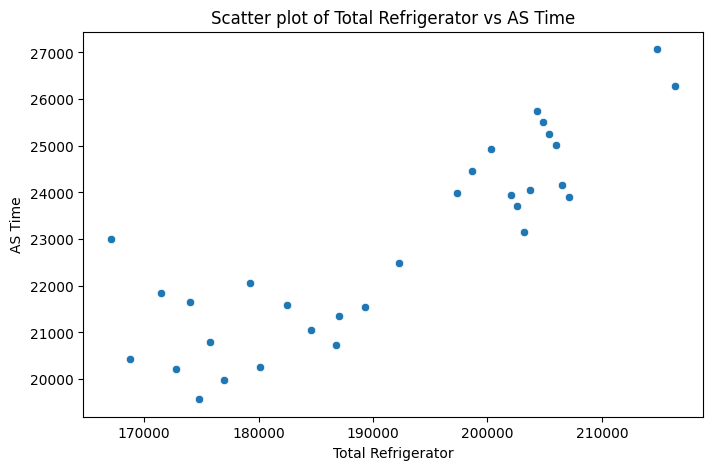

In [6]:
## 데이터 시각화
plt.figure(figsize = (8, 5))
sns.scatterplot(x = 'total_refrigerator', y = 'as_time', data = data)
plt.title('Scatter plot of Total Refrigerator vs AS Time')
plt.xlabel('Total Refrigerator')
plt.ylabel('AS Time')
plt.show()

## 단순선형회귀모형 적합

In [7]:
from sklearn.linear_model import LinearRegression

## 독립 변수와 종속 변수 설정
# X = data['total_refrigerator'] # 1차원 배열 (31, )
# X = X.values.reshape(31, 1)  # 2차원 배열(31, 1)로 변환

X = data[['total_refrigerator']] ## 2차원 배열 (31, 1)
y = data['as_time'] ## 1차원 배열 (31, )

X, y

(    total_refrigerator
 0               168750
 1               171450
 2               172800
 3               174000
 4               174810
 5               175800
 6               177000
 7               179250
 8               180165
 9               182520
 10              184560
 11              186750
 12              187035
 13              189300
 14              192240
 15              167145
 16              197355
 17              198690
 18              200280
 19              202035
 20              202590
 21              203160
 22              203715
 23              204285
 24              204840
 25              205410
 26              205965
 27              206535
 28              207090
 29              214800
 30              216375,
 0     20423
 1     21850
 2     20214
 3     21660
 4     19569
 5     20799
 6     19990
 7     22050
 8     20260
 9     21596
 10    21043
 11    20726
 12    21355
 13    21535
 14    22486
 15    22994
 16    23978
 17    244

In [8]:
## 모델 생성 및 학습
model = LinearRegression() # 객체 생성
model.fit(X = X,
          y = y) # 모델 적합(학습)

LinearRegression()

In [9]:
## 회귀계수 확인
print('회귀계수:', model.coef_[0]) # beta1
print('절편:', model.intercept_) # beta0
# Y = 냉장고 수 * beta1 + beta0

회귀계수: 0.12242582466528462
절편: -550.9481706579099


In [10]:
## 예측 값 계산
y_pred = model.predict(X)
y_pred

array([20108.40974161, 20438.95946821, 20604.2343315 , 20751.1453211 ,
       20850.31023908, 20971.5118055 , 21118.4227951 , 21393.88090059,
       21505.90053016, 21794.21334725, 22043.96202957, 22312.07458558,
       22346.96594561, 22624.26043848, 22984.192363  , 19911.91629302,
       23610.40045616, 23773.83893209, 23968.49599331, 24183.35331559,
       24251.29964828, 24321.08236834, 24389.02870103, 24458.81142109,
       24526.75775378, 24596.54047384, 24664.48680653, 24734.26952659,
       24802.21585928, 25746.11896745, 25938.93964129])

## 시각화

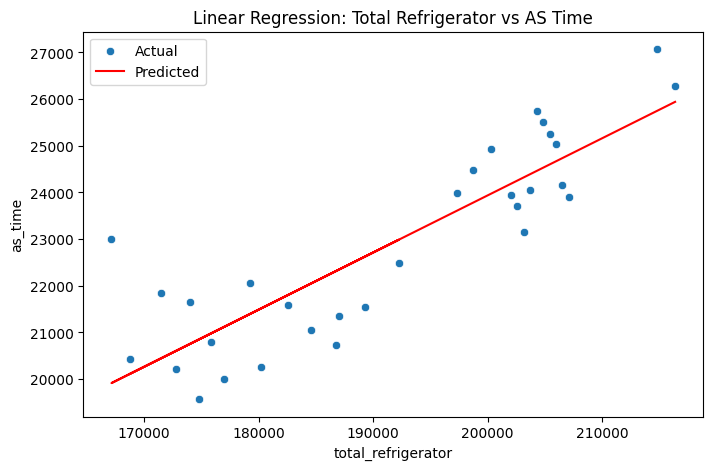

In [11]:
## 데이터 시각화
plt.figure(figsize = (8, 5))
sns.scatterplot(x = 'total_refrigerator',
                y = 'as_time',
                data = data,
                label = 'Actual')
plt.plot(data['total_refrigerator'],
         y_pred,
         color = 'red',
         label = 'Predicted')

plt.title('Linear Regression: Total Refrigerator vs AS Time')
plt.legend()
plt.show()

## 모델 성능 평가
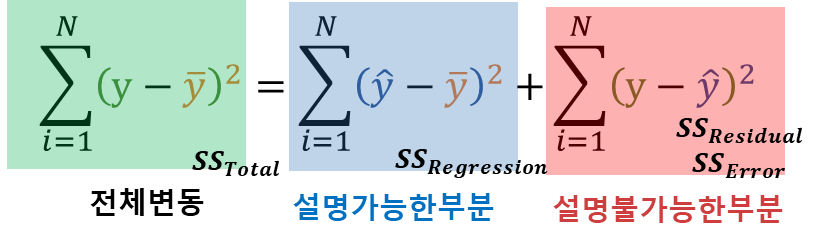

In [12]:
data.columns

Index(['total_refrigerator', 'old_refrigerator', 'as_time'], dtype='object')

In [13]:
## R2 기본 값 계산
sst = np.sum((data['as_time'] - np.mean(data['as_time']))**2)
ssr = np.sum((y_pred - np.mean(data['as_time']))**2)
sse = np.sum((data['as_time'] - y_pred)**2)

r_squared = ssr / sst
print(f'R-제곱: {r_squared}')

R-제곱: 0.7445320277443197


In [14]:
## 모델이용한 R2 값 계산값 확인
r_squared_ = model.score(X, y)
print('R-squared:', r_squared_)

R-squared: 0.7445320277443198


## 만약 새로운 데이터가 있다면

In [15]:
# 새로운 데이터로 예측
new = pd.DataFrame({'total_refrigerator': [235000]}) # X와 동일한 형태로 만들어주기
predicted_as_time = model.predict(new)
predicted_as_time[0]

np.float64(28219.120625683976)

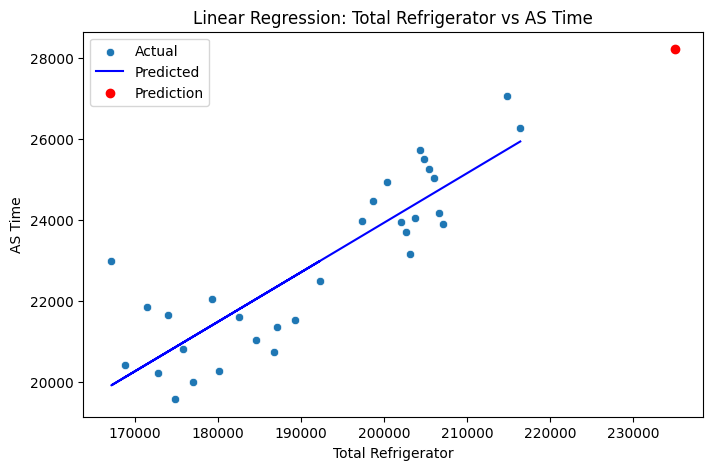

In [16]:
## 예측 결과 시각화
plt.figure(figsize=(8, 5))
sns.scatterplot(x = 'total_refrigerator',
                y = 'as_time',
                data = data,
                label = 'Actual')
plt.plot(data['total_refrigerator'], y_pred,
         color='blue',
         label='Predicted')
plt.scatter(new['total_refrigerator'],
            predicted_as_time,
            color='red',
            label='Prediction',
            zorder=5)
plt.title('Linear Regression: Total Refrigerator vs AS Time')
plt.xlabel('Total Refrigerator')
plt.ylabel('AS Time')
plt.legend()
plt.show()


## 회귀모형 가정 확인

- Residuals vs Fitted:
  - 잔차가 랜덤하게 분포하는지 확인  
  - 패턴이 없다면 **선형성** 가정 만족
- QQ Plot (Normal Q-Q):
  - 잔차가 정규 분포를 따르는지 확인  
  - 점들이 대각선에 가까우면 **정규성** 가정 만족!
- Scale-Location (Spread-Location):
  - 잔차의 분산이 일정한지 확인
  - 빨간 선이 수평에 가까울수록 **등분산** 가정 만족
- Residuals vs Leverage:
  - 레버리지 점수가 높은 이상치가 있는지 확인
  - 높은 레버리지와 큰 잔차를 가진 점들은 영향력이 큰 관측치임

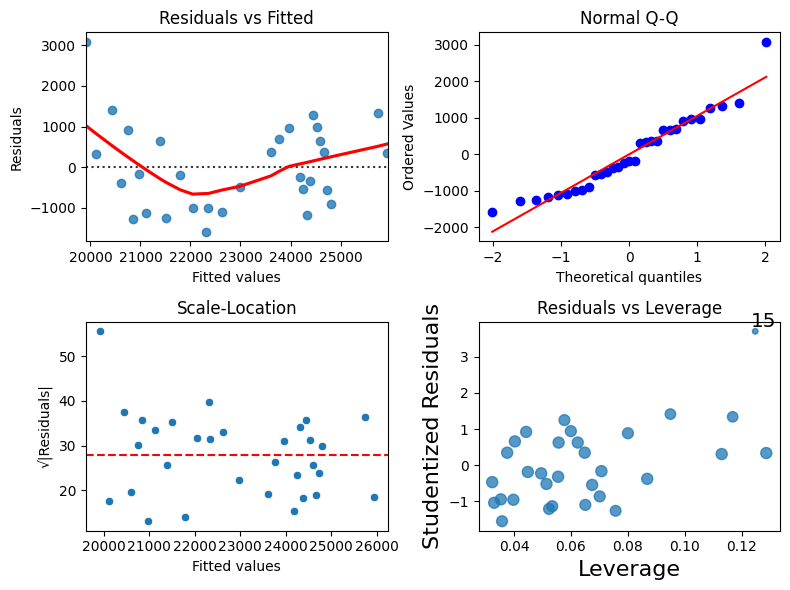

In [17]:
## 다중 플롯을 그릴 수 있는 함수
# from scipy.stats import probplot

## 통계 모듈을 이용한 R^2 계산 (statsmodels)
X_with_const = sm.add_constant(X) ## 독립 변수에 상수 추가
model_sm  =  sm.OLS(y, X_with_const).fit() ## 모델 적합


def plot_regression_diagnostics(model_sm):
    fig, axes  =  plt.subplots(2, 2, figsize = (8, 6))

    # Residuals vs Fitted
    sns.residplot(x = model_sm.fittedvalues, y = model_sm.resid, lowess = True, line_kws = {'color': 'red'}, ax = axes[0, 0])
    axes[0, 0].set_title('Residuals vs Fitted')
    axes[0, 0].set_xlabel('Fitted values')
    axes[0, 0].set_ylabel('Residuals')

    # Normal Q-Q
    probplot(model_sm.resid, dist = "norm", plot = axes[0, 1])
    axes[0, 1].set_title('Normal Q-Q')

    # Scale-Location
    sns.scatterplot(x = model_sm.fittedvalues, y = np.sqrt(np.abs(model_sm.resid)), ax = axes[1, 0])
    axes[1, 0].axhline(y = np.mean(np.sqrt(np.abs(model_sm.resid))), color = 'r', linestyle = '--')
    axes[1, 0].set_title('Scale-Location')
    axes[1, 0].set_xlabel('Fitted values')
    axes[1, 0].set_ylabel('√|Residuals|')

    # Residuals vs Leverage
    sm.graphics.influence_plot(model_sm, criterion = "cooks", ax = axes[1, 1], size = 4)
    axes[1, 1].set_title('Residuals vs Leverage')

    plt.tight_layout()
    plt.show()

# 회귀모형의 가정 확인
plot_regression_diagnostics(model_sm)

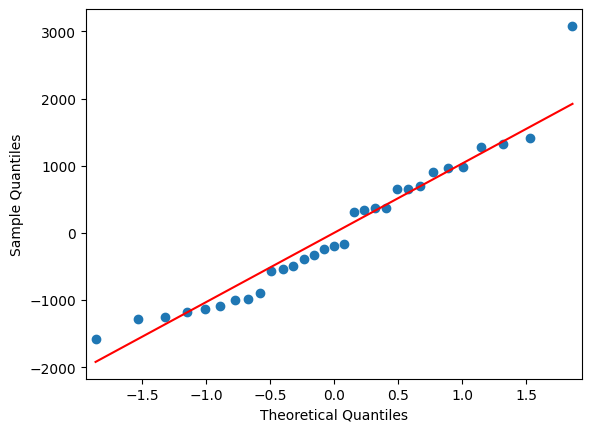

In [18]:
# 잔차 Q-Q 플롯
fig = sm.qqplot(model_sm.resid, line='s')
plt.show()

### (참고) statsmodels 활용

In [19]:
## 모델 생성 및 학습

# statsmodels를 사용한 회귀 모델 생성
X_with_const = sm.add_constant(X)  # 독립 변수에 상수 추가 # model = LinearRegression(), model.fit(X, y) 과 달리...선형 회귀 모델을 만들 때 절편을 포함시켜줘야 함 ㅠ
model_sm = sm.OLS(y, X_with_const).fit()  # 회귀 모델 적합
model_sm


# R2 값 계산
r_squared = model_sm.rsquared
print("R2:", r_squared)


## 회귀 계수 및 절편 출력
print("회귀계수:", model_sm.params)


## 새로운 데이터 예측
new_data = pd.DataFrame({'total_refrigerator': [240000]})

# 새로운 데이터에 상수 추가 (수동..)
new_data_with_const = pd.DataFrame({'const': 1, 'total_refrigerator': [240000]})

# 데이터 확인
print(new_data_with_const)

# 모델을 사용하여 예측
point_estimate = model_sm.predict(new_data_with_const)
print("예측값:", point_estimate)

R2: 0.74453202774432
회귀계수: const                -550.948171
total_refrigerator      0.122426
dtype: float64
   const  total_refrigerator
0      1              240000
예측값: 0    28831.249749
dtype: float64


## EOS